<a href="https://colab.research.google.com/github/pavankumarjnnce/Information_Science_Engg/blob/main/Sobel_Canny_Prewitt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

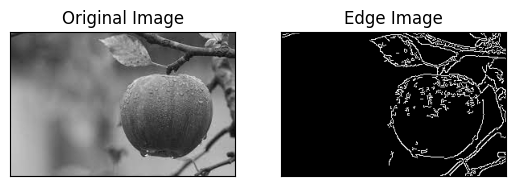

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('fruit.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [14]:
#Sobel
import cv2
from matplotlib import pyplot as plt
import numpy as np

import requests
url = "https://cdn.pixabay.com/photo/2017/05/17/12/42/tiger-2320819_960_720.jpg"
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content)


In [15]:
img = cv2.imread('test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)

(-0.5, 959.5, 639.5, -0.5)

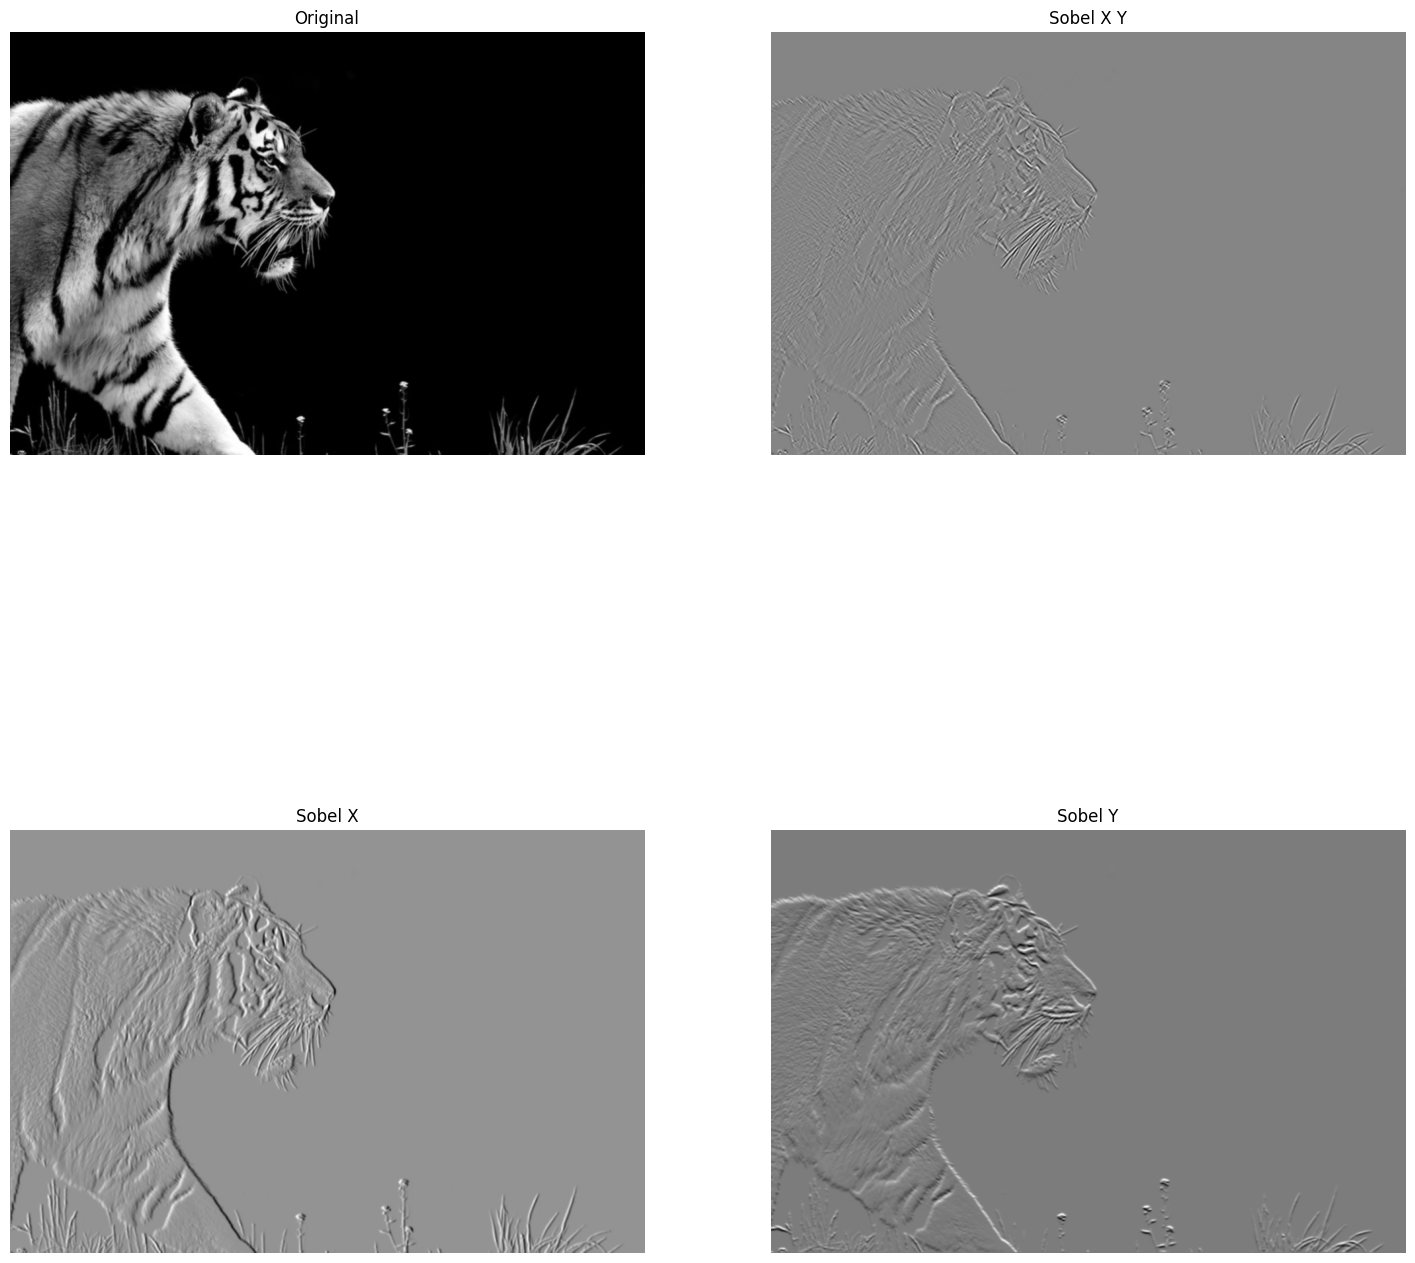

In [20]:
#It finds the largest increase in intensity from light to dark and emphasises on those pixels giving an edge enhanced image.

#Syntax: dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
#Where, ddepth is the depth of the destination image, dx is Horizontal sobel derivative, dy is vertical sobel derivative and ksize is the kernel size.

sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")

plt.subplot(222)
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y')
plt.axis("off")

plt.subplot(223)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")

plt.subplot(224)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")


In [35]:
#define kernal convolution function
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]

    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]

    H = (F_height - 1) // 2
    W = (F_width - 1) // 2

    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution
    return out

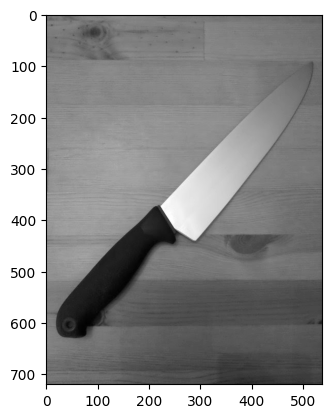

In [36]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
#read the image in gray scale
img = cv2.imread('knife.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

In [37]:
#define horizontal and Vertical sobel kernels
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [38]:
#normalizing the vectors
pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

In [39]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

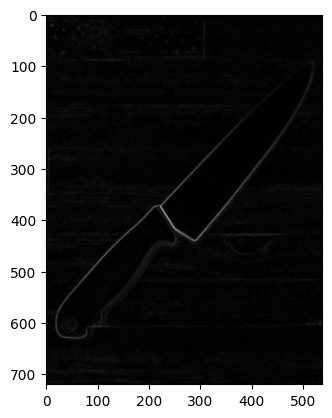

In [40]:
#output images
cv2.imwrite('output/prewitt_knife.jpg', pre_out)
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()